--- Grafo de Logística Criado ---
Caminho Mínimo (Dijkstra) para destaque: Alpha -> Beta -> Delta -> Epsilon


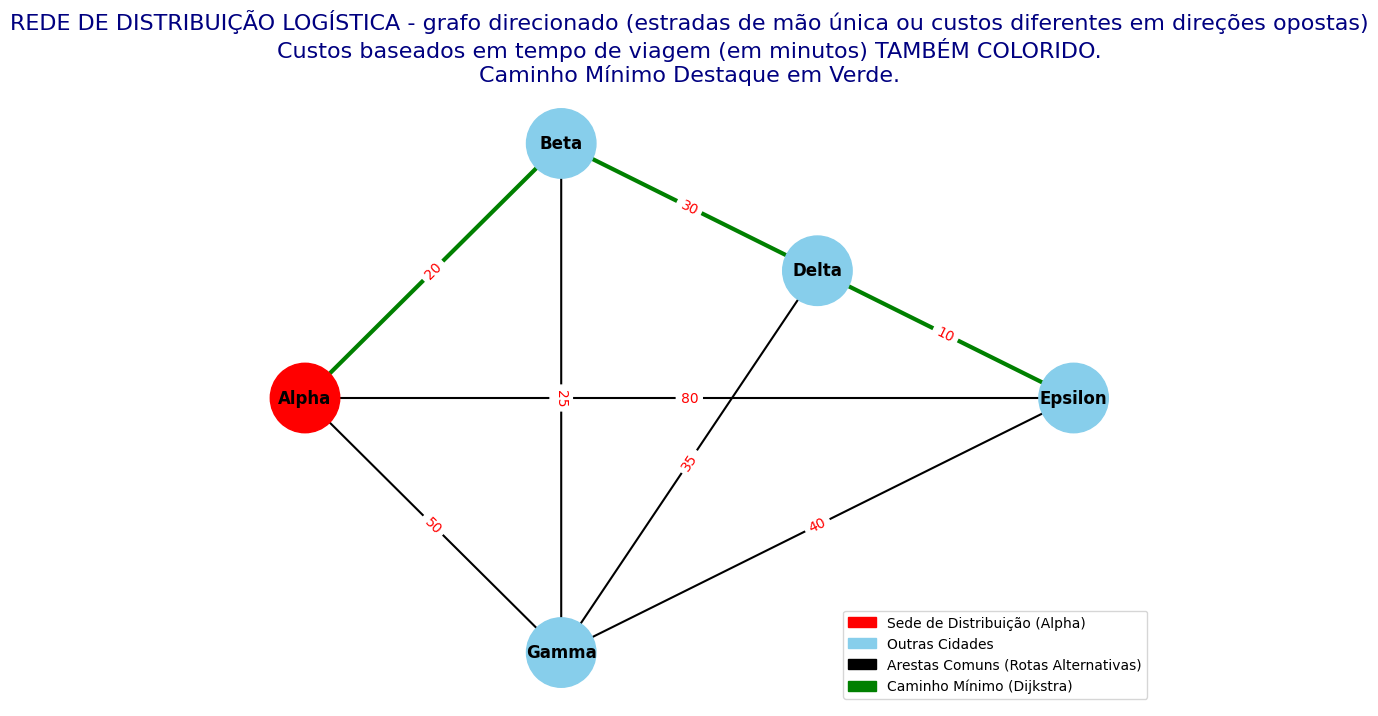

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

G = nx.DiGraph()

cidades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
G.add_nodes_from(cidades)

arestas_e_custos = [
    ('Alpha', 'Beta', {'weight': 20}),
    ('Alpha', 'Gamma', {'weight': 50}),
    ('Beta', 'Delta', {'weight': 30}),
    ('Gamma', 'Epsilon', {'weight': 40}),
    ('Delta', 'Epsilon', {'weight': 10}),
    ('Epsilon', 'Alpha', {'weight': 80}),
    ('Beta', 'Gamma', {'weight': 25}),
    ('Gamma', 'Delta', {'weight': 35})
]

G.add_edges_from(arestas_e_custos)

print("--- Grafo de Logística Criado ---")

pos = {
    'Alpha': (0, 0),
    'Beta': (1, 1),
    'Gamma': (1, -1),
    'Delta': (2, 0.5),
    'Epsilon': (3, 0)
}

edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12, 8))

node_colors = ['red' if node == 'Alpha' else 'skyblue' for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=2500, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

origem = 'Alpha'
destino = 'Epsilon'

try:
    caminho_dijkstra = nx.dijkstra_path(G, source=origem, target=destino, weight='weight')
    path_edges = list(zip(caminho_dijkstra, caminho_dijkstra[1:]))

    non_path_edges = [edge for edge in G.edges() if edge not in path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=non_path_edges, arrowsize=20, edge_color='black', width=1.5)

    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3.0, arrowsize=25)
    print(f"Caminho Mínimo (Dijkstra) para destaque: {' -> '.join(caminho_dijkstra)}")
except nx.NetworkXNoPath:
    print(f"Não há caminho entre {origem} e {destino} para destaque visual.")
    path_edges = []
    nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color='black', width=1.5)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("REDE DE DISTRIBUIÇÃO LOGÍSTICA - grafo direcionado (estradas de mão única ou custos diferentes em direções opostas)\nCustos baseados em tempo de viagem (em minutos) TAMBÉM COLORIDO.\nCaminho Mínimo Destaque em Verde.", color='navy', fontsize=16)

red_patch = mpatches.Patch(color='red', label='Sede de Distribuição (Alpha)')
blue_patch = mpatches.Patch(color='skyblue', label='Outras Cidades')
black_line = mpatches.Patch(color='black', label='Arestas Comuns (Rotas Alternativas)')
green_line = mpatches.Patch(color='green', label='Caminho Mínimo (Dijkstra)')
plt.legend(handles=[red_patch, blue_patch, black_line, green_line], loc='lower right')

plt.axis('off')
plt.show()


In [76]:

origem = 'Alpha'
destino = 'Epsilon'

print(f"\n--- Parte 2: Cálculo de Caminho Mínimo (Origem: {origem}, Destino: {destino}) ---")
caminho_minimo_manual = "Alpha -> Beta -> Delta -> Epsilon"
custo_manual = 60
print(f"Caminho Mínimo Manualmente Encontrado: {caminho_minimo_manual} (Custo: {custo_manual} minutos)")

try:
    caminho_dijkstra = nx.dijkstra_path(G, source=origem, target=destino, weight='weight')
    custo_dijkstra = nx.dijkstra_path_length(G, source=origem, target=destino, weight='weight')

    print("\n--- Validação (Método Avançado - Dijkstra) ---")
    print(f"Caminho Mínimo (Dijkstra): {' -> '.join(caminho_dijkstra)}")
    print(f"Custo Mínimo (Dijkstra): {custo_dijkstra} minutos")

    if custo_manual == custo_dijkstra:
        print("Validação OK: O cálculo simples está correto.")
    else:
        print(f"ATENÇÃO: Discrepância de custo! Manual: {custo_manual}, Dijkstra: {custo_dijkstra}")

except nx.NetworkXNoPath:
    print(f"Não há caminho entre {origem} e {destino}.")


--- Parte 2: Cálculo de Caminho Mínimo (Origem: Alpha, Destino: Epsilon) ---
Caminho Mínimo Manualmente Encontrado: Alpha -> Beta -> Delta -> Epsilon (Custo: 60 minutos)

--- Validação (Método Avançado - Dijkstra) ---
Caminho Mínimo (Dijkstra): Alpha -> Beta -> Delta -> Epsilon
Custo Mínimo (Dijkstra): 60 minutos
Validação OK: O cálculo simples está correto.



--- Parte 3 & 4: Simulação de Falha (Beta -> Delta) ---
A aresta ('Beta', 'Delta') foi removida para análise de robustez.

 Impacto da Falha e Rota Alternativa
Caminho Mínimo Original (Alpha -> Epsilon): 60 minutos
Caminho Mínimo Alternativo após Falha: Alpha -> Beta -> Gamma -> Epsilon
Novo Custo Mínimo: 85 minutos

 Análise de Robustez da Rede
Impacto na Entrega: A falha da estrada (Beta -> Delta) causou um aumento de custo de 25 minutos (85 - 60).
Cidades/Estradas Críticas: A estrada Beta -> Delta era crítica. Sua falha forçou o uso de rotas alternativas que passam por Gamma.
Alternativas Viáveis: Sim, a entrega ainda é possível via Rota 3 (Alpha → Beta → Gamma → Epsilon) ou Rota 2 (Alpha → Gamma → Epsilon).
Conclusão: A rede é relativamente robusta (ainda existe um caminho), mas a falha resultou em um aumento de tempo de viagem de 141.7% (85/60).


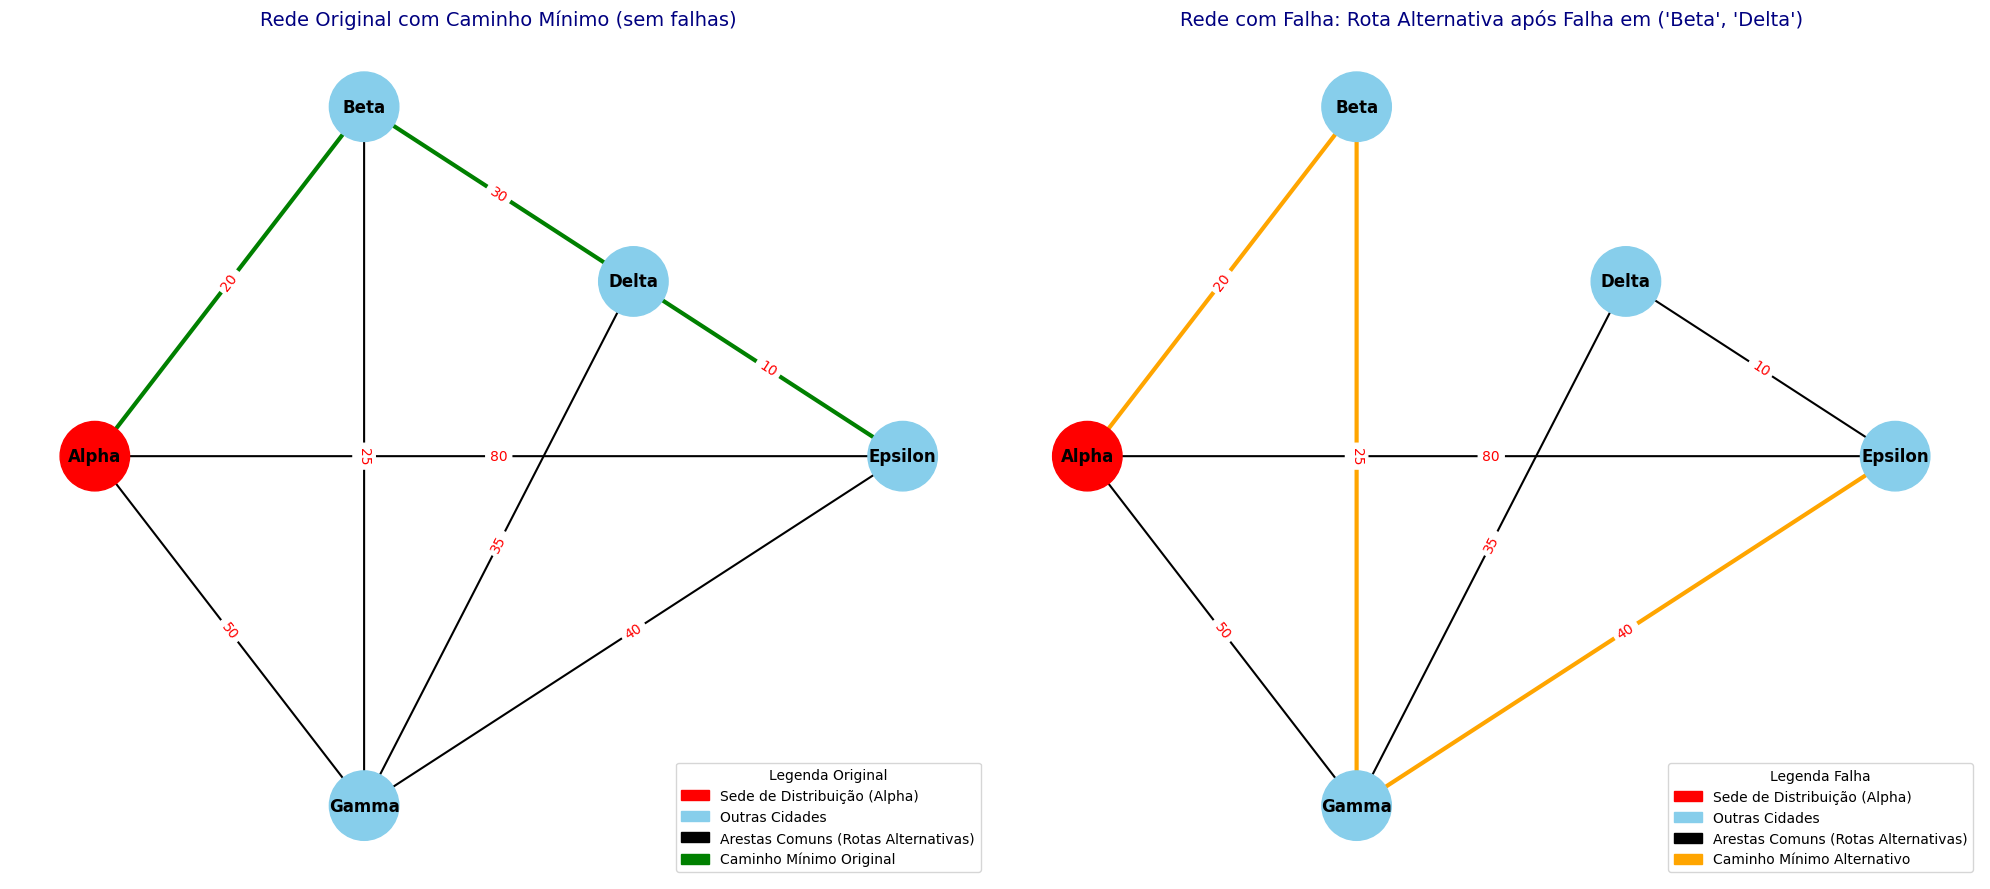

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

aresta_falha = ('Beta', 'Delta')
if G.has_edge(*aresta_falha):
    G_falha = G.copy()
    G_falha.remove_edge(*aresta_falha)
    print(f"\n--- Parte 3 & 4: Simulação de Falha ({aresta_falha[0]} -> {aresta_falha[1]}) ---")
    print(f"A aresta {aresta_falha} foi removida para análise de robustez.")

    try:
        if 'caminho_dijkstra' not in locals() or 'custo_dijkstra' not in locals():
            print("Recalculando caminho original para fins de comparação...")
            caminho_dijkstra = nx.dijkstra_path(G, source=origem, target=destino, weight='weight')
            custo_dijkstra = nx.dijkstra_path_length(G, source=origem, target=destino, weight='weight')

        caminho_alternativo = nx.dijkstra_path(G_falha, source=origem, target=destino, weight='weight')
        custo_alternativo = nx.dijkstra_path_length(G_falha, source=origem, target=destino, weight='weight')

        print("\n Impacto da Falha e Rota Alternativa")
        print(f"Caminho Mínimo Original ({origem} -> {destino}): {custo_dijkstra} minutos")
        print(f"Caminho Mínimo Alternativo após Falha: {' -> '.join(caminho_alternativo)}")
        print(f"Novo Custo Mínimo: {custo_alternativo} minutos")

        impacto = custo_alternativo - custo_dijkstra

        print(f"\n Análise de Robustez da Rede")
        print(f"Impacto na Entrega: A falha da estrada ({aresta_falha[0]} -> {aresta_falha[1]}) causou um aumento de custo de {impacto} minutos ({custo_alternativo} - {custo_dijkstra}).")

        if impacto > 0:
            print(f"Cidades/Estradas Críticas: A estrada {aresta_falha[0]} -> {aresta_falha[1]} era crítica. Sua falha forçou o uso de rotas alternativas que passam por Gamma.")
            print(f"Alternativas Viáveis: Sim, a entrega ainda é possível via Rota 3 (Alpha \u2192 Beta \u2192 Gamma \u2192 Epsilon) ou Rota 2 (Alpha \u2192 Gamma \u2192 Epsilon).")
            print(f"Conclusão: A rede é relativamente robusta (ainda existe um caminho), mas a falha resultou em um aumento de tempo de viagem de {((custo_alternativo/custo_dijkstra)*100):.1f}% ({custo_alternativo}/{custo_dijkstra}).")
        else:
            print("Conclusão: A falha não impactou o custo mínimo, sugerindo que a estrada removida não fazia parte do caminho mais eficiente.")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

        ax1.set_title("Rede Original com Caminho Mínimo (sem falhas)", fontsize=14, color='navy')
        ax1.axis('off')

        nx.draw_networkx_nodes(G, pos, node_size=2500, node_color=node_colors, ax=ax1)
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax1)

        path_edges_original = list(zip(caminho_dijkstra, caminho_dijkstra[1:]))

        non_path_edges_original = [edge for edge in G.edges() if edge not in path_edges_original]
        nx.draw_networkx_edges(G, pos, edgelist=non_path_edges_original, arrowsize=20, edge_color='black', width=1.5, ax=ax1)

        nx.draw_networkx_edges(G, pos, edgelist=path_edges_original, edge_color='green', width=3.0, arrowsize=25, ax=ax1)

        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', ax=ax1)

        red_patch_orig = mpatches.Patch(color='red', label='Sede de Distribuição (Alpha)')
        blue_patch_orig = mpatches.Patch(color='skyblue', label='Outras Cidades')
        black_line_orig = mpatches.Patch(color='black', label='Arestas Comuns (Rotas Alternativas)')
        green_patch_orig = mpatches.Patch(color='green', label='Caminho Mínimo Original')
        ax1.legend(handles=[red_patch_orig, blue_patch_orig, black_line_orig, green_patch_orig], loc='lower right', title='Legenda Original')

        ax2.set_title(f"Rede com Falha: Rota Alternativa após Falha em {aresta_falha}", fontsize=14, color='navy')
        ax2.axis('off')

        nx.draw_networkx_nodes(G_falha, pos, node_size=2500, node_color=node_colors, ax=ax2)
        nx.draw_networkx_labels(G_falha, pos, font_size=12, font_weight='bold', ax=ax2)

        path_edges_alternativo = list(zip(caminho_alternativo, caminho_alternativo[1:]))

        non_path_edges_alternativo = [edge for edge in G_falha.edges() if edge not in path_edges_alternativo]
        nx.draw_networkx_edges(G_falha, pos, edgelist=non_path_edges_alternativo, arrowsize=20, edge_color='black', width=1.5, ax=ax2)

        nx.draw_networkx_edges(G_falha, pos, edgelist=path_edges_alternativo, edge_color='orange', width=3.0, arrowsize=25, ax=ax2)

        edge_labels_falha = nx.get_edge_attributes(G_falha, 'weight')
        nx.draw_networkx_edge_labels(G_falha, pos, edge_labels=edge_labels_falha, font_color='red', ax=ax2)

        red_patch_falha = mpatches.Patch(color='red', label='Sede de Distribuição (Alpha)')
        blue_patch_falha = mpatches.Patch(color='skyblue', label='Outras Cidades')
        black_line_falha = mpatches.Patch(color='black', label='Arestas Comuns (Rotas Alternativas)')
        orange_patch_falha = mpatches.Patch(color='orange', label='Caminho Mínimo Alternativo')
        ax2.legend(handles=[red_patch_falha, blue_patch_falha, black_line_falha, orange_patch_falha], loc='lower right', title='Legenda Falha')

        plt.tight_layout()
        plt.show()

    except nx.NetworkXNoPath:
        print(f"\nFALHA CRÍTICA: Não existe mais caminho de {origem} para {destino} após a falha. A estrada removida era um Ponto de Falha Único.")

--- Módulo I: Rede de Logística Construída ---


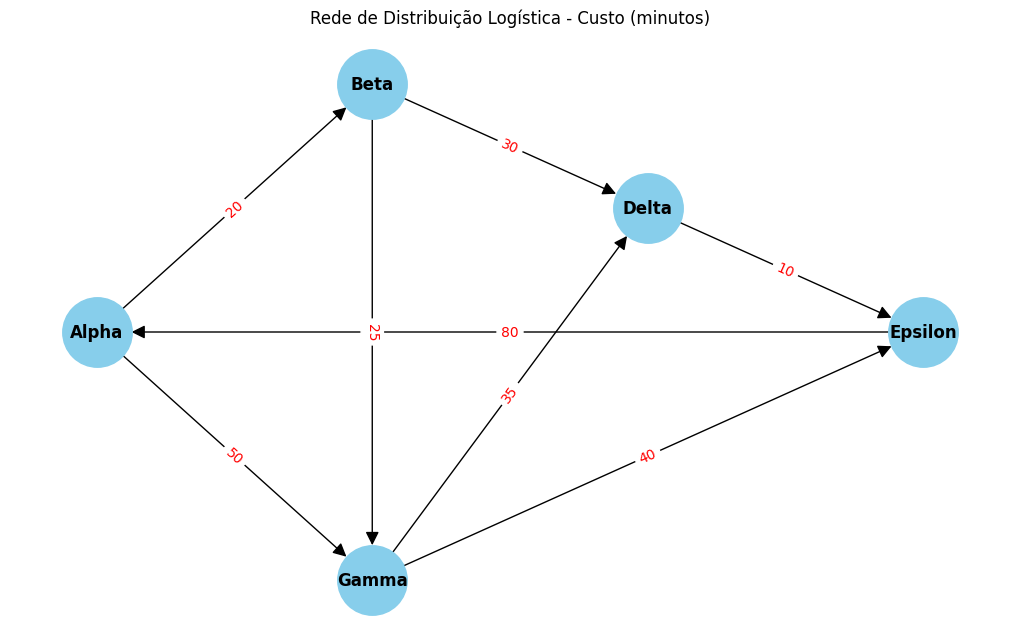


--- Módulo II: Cálculo de Caminho Mínimo (Origem: Alpha, Destino: Epsilon) ---
Caminho Mínimo Manualmente Encontrado: Alpha -> Beta -> Delta -> Epsilon (Custo: 60 minutos)
Caminho Mínimo (Dijkstra): Alpha -> Beta -> Delta -> Epsilon
Custo Mínimo (Dijkstra): 60 minutos

--- Módulo III & IV: Simulação de Falha (Beta -> Delta) ---
A aresta ('Beta', 'Delta') (Custo: 30) foi removida.

Análise de Robustez da Rede
Rota Mais Curta Original: 60 minutos
Rota Mais Curta Alternativa: Alpha -> Beta -> Gamma -> Epsilon (85 minutos)
Impacto na Entrega: Aumento de custo de 25 minutos.
Alternativa Viável: Sim. A entrega é garantida, demonstrando Robustez da rede.
Estrada Crítica: Beta -> Delta era crucial para o desempenho ótimo.

--- Módulo V: Contextualização e Comparação com Grupo Fictício ---
O Grupo A (Nosso) priorizou a CONECTIVIDADE, resultando em: 
* Maior custo inicial (60 min vs 55 min do Grupo B).
* Garantia de entrega em caso de falha (Aumento de 25 min).
O Grupo B priorizou o CUSTO MÍNIM

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

cidades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
G.add_nodes_from(cidades)

arestas_e_custos = [
    ('Alpha', 'Beta', {'weight': 20}),
    ('Alpha', 'Gamma', {'weight': 50}),
    ('Beta', 'Delta', {'weight': 30}),
    ('Gamma', 'Epsilon', {'weight': 40}),
    ('Delta', 'Epsilon', {'weight': 10}),
    ('Epsilon', 'Alpha', {'weight': 80}),
    ('Beta', 'Gamma', {'weight': 25}),
    ('Gamma', 'Delta', {'weight': 35})
]

G.add_edges_from(arestas_e_custos)

print("--- Módulo I: Rede de Logística Construída ---")

pos = {
    'Alpha': (0, 0),
    'Beta': (1, 1),
    'Gamma': (1, -1),
    'Delta': (2, 0.5),
    'Epsilon': (3, 0)
}

edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=2500,
    node_color='skyblue',
    font_size=12,
    font_weight='bold',
    arrowsize=20
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Rede de Distribuição Logística - Custo (minutos)")
plt.show()

origem = 'Alpha'
destino = 'Epsilon'

caminhos_simples = [
    ("Alpha -> Beta -> Delta -> Epsilon", 20 + 30 + 10),
    ("Alpha -> Gamma -> Epsilon", 50 + 40),
    ("Alpha -> Beta -> Gamma -> Epsilon", 20 + 25 + 40),
    ("Alpha -> Gamma -> Delta -> Epsilon", 50 + 35 + 10)
]

caminho_minimo_manual, custo_manual = min(caminhos_simples, key=lambda x: x[1])

print(f"\n--- Módulo II: Cálculo de Caminho Mínimo (Origem: {origem}, Destino: {destino}) ---")
print(f"Caminho Mínimo Manualmente Encontrado: {caminho_minimo_manual} (Custo: {custo_manual} minutos)")

try:
    caminho_dijkstra = nx.dijkstra_path(G, source=origem, target=destino, weight='weight')
    custo_dijkstra = nx.dijkstra_path_length(G, source=origem, target=destino, weight='weight')
    print(f"Caminho Mínimo (Dijkstra): {' -> '.join(caminho_dijkstra)}")
    print(f"Custo Mínimo (Dijkstra): {custo_dijkstra} minutos")
except nx.NetworkXNoPath:
    print("Não há caminho na rede.")

aresta_falha = ('Beta', 'Delta')
print(f"\n--- Módulo III & IV: Simulação de Falha ({aresta_falha[0]} -> {aresta_falha[1]}) ---")

if G.has_edge(*aresta_falha):
    G_falha = G.copy()
    G_falha.remove_edge(*aresta_falha)
    print(f"A aresta {aresta_falha} (Custo: 30) foi removida.")

    try:
        caminho_alternativo = nx.dijkstra_path(G_falha, source=origem, target=destino, weight='weight')
        custo_alternativo = nx.dijkstra_path_length(G_falha, source=origem, target=destino, weight='weight')

        impacto = custo_alternativo - custo_dijkstra

        print("\nAnálise de Robustez da Rede")
        print(f"Rota Mais Curta Original: {custo_dijkstra} minutos")
        print(f"Rota Mais Curta Alternativa: {' -> '.join(caminho_alternativo)} ({custo_alternativo} minutos)")
        print(f"Impacto na Entrega: Aumento de custo de {impacto} minutos.")
        print(f"Alternativa Viável: Sim. A entrega é garantida, demonstrando Robustez da rede.")
        print(f"Estrada Crítica: {aresta_falha[0]} -> {aresta_falha[1]} era crucial para o desempenho ótimo.")

    except nx.NetworkXNoPath:
        print("\n FALHA CRÍTICA: A rede foi desconectada. Nenhuma rota alternativa é possível.")

print("\n--- Módulo V: Contextualização e Comparação com Grupo Fictício ---")
print("O Grupo A (Nosso) priorizou a CONECTIVIDADE, resultando em: ")
print("* Maior custo inicial (60 min vs 55 min do Grupo B).")
print("* Garantia de entrega em caso de falha (Aumento de 25 min).")
print("O Grupo B priorizou o CUSTO MÍNIMO, resultando em:")
print("* Menor custo inicial (55 min).")
print("* Fragilidade: Falha de uma aresta crítica resulta em rede desconectada e falha na entrega.")

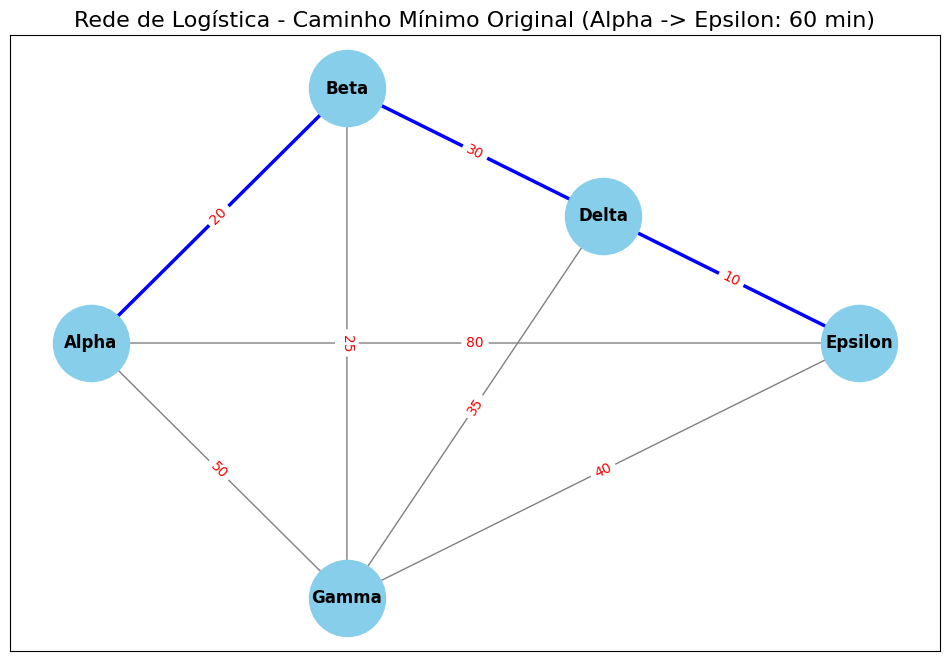

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

G_original = nx.DiGraph()
cidades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
G_original.add_nodes_from(cidades)
arestas_e_custos = [
    ('Alpha', 'Beta', {'weight': 20}),
    ('Alpha', 'Gamma', {'weight': 50}),
    ('Beta', 'Delta', {'weight': 30}),
    ('Gamma', 'Epsilon', {'weight': 40}),
    ('Delta', 'Epsilon', {'weight': 10}),
    ('Epsilon', 'Alpha', {'weight': 80}),
    ('Beta', 'Gamma', {'weight': 25}),
    ('Gamma', 'Delta', {'weight': 35})
]
G_original.add_edges_from(arestas_e_custos)

pos = {
    'Alpha': (0, 0),
    'Beta': (1, 1),
    'Gamma': (1, -1),
    'Delta': (2, 0.5),
    'Epsilon': (3, 0)
}

edge_labels = nx.get_edge_attributes(G_original, 'weight')

plt.figure(figsize=(12, 8))

nx.draw_networkx_edges(G_original, pos, edge_color='gray', width=1)
caminho_minimo_original = nx.dijkstra_path(G_original, source='Alpha', target='Epsilon', weight='weight')
caminho_edges = [(caminho_minimo_original[i], caminho_minimo_original[i+1]) for i in range(len(caminho_minimo_original)-1)]
nx.draw_networkx_edges(G_original, pos, edgelist=caminho_edges, edge_color='blue', width=2.5, arrowsize=25)

nx.draw_networkx_nodes(G_original, pos, node_size=3000, node_color='skyblue')

nx.draw_networkx_labels(G_original, pos, font_size=12, font_weight='bold')

nx.draw_networkx_edge_labels(G_original, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("Rede de Logística - Caminho Mínimo Original (Alpha -> Epsilon: 60 min)", size=16)
plt.show()

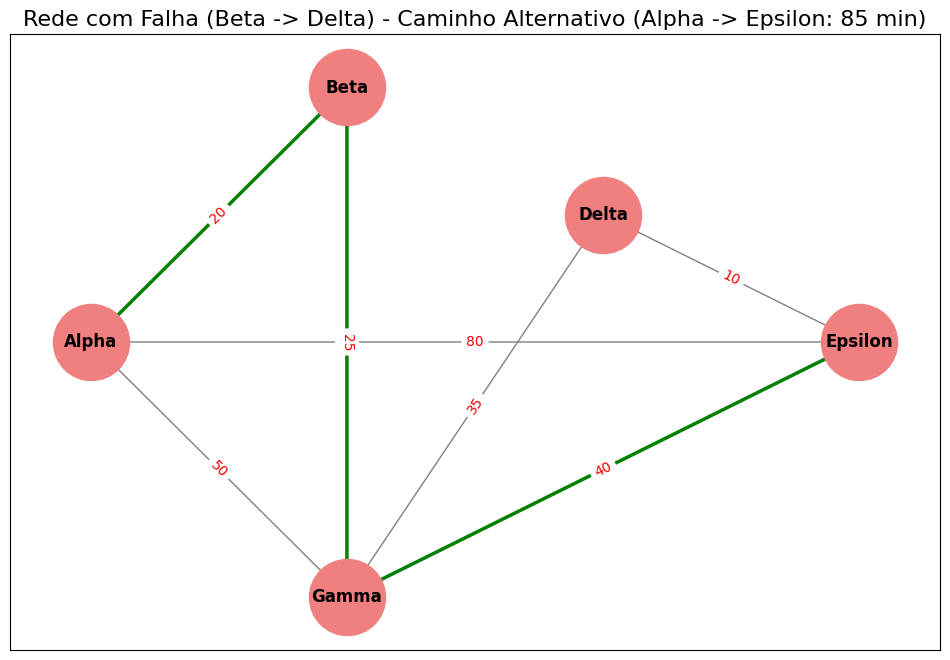

In [80]:
import networkx as nx
import matplotlib.pyplot as plt

G_falha = nx.DiGraph()
cidades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
G_falha.add_nodes_from(cidades)
arestas_e_custos = [
    ('Alpha', 'Beta', {'weight': 20}),
    ('Alpha', 'Gamma', {'weight': 50}),
    ('Beta', 'Delta', {'weight': 30}),
    ('Gamma', 'Epsilon', {'weight': 40}),
    ('Delta', 'Epsilon', {'weight': 10}),
    ('Epsilon', 'Alpha', {'weight': 80}),
    ('Beta', 'Gamma', {'weight': 25}),
    ('Gamma', 'Delta', {'weight': 35})
]
G_falha.add_edges_from(arestas_e_custos)

aresta_falha = ('Beta', 'Delta')
if G_falha.has_edge(*aresta_falha):
    G_falha.remove_edge(*aresta_falha)

pos = {
    'Alpha': (0, 0),
    'Beta': (1, 1),
    'Gamma': (1, -1),
    'Delta': (2, 0.5),
    'Epsilon': (3, 0)
}

edge_labels = nx.get_edge_attributes(G_falha, 'weight')

plt.figure(figsize=(12, 8))

nx.draw_networkx_edges(G_falha, pos, edge_color='gray', width=1)
try:
    caminho_alternativo = nx.dijkstra_path(G_falha, source='Alpha', target='Epsilon', weight='weight')
    caminho_alternativo_edges = [(caminho_alternativo[i], caminho_alternativo[i+1]) for i in range(len(caminho_alternativo)-1)]
    nx.draw_networkx_edges(G_falha, pos, edgelist=caminho_alternativo_edges, edge_color='green', width=2.5, arrowsize=25)
    custo_alternativo = nx.dijkstra_path_length(G_falha, source='Alpha', target='Epsilon', weight='weight')
    title = f"Rede com Falha (Beta -> Delta) - Caminho Alternativo (Alpha -> Epsilon: {custo_alternativo} min)"
except nx.NetworkXNoPath:
    title = "Rede com Falha (Beta -> Delta) - Nenhuma rota alternativa para Epsilon"

nx.draw_networkx_nodes(G_falha, pos, node_size=3000, node_color='lightcoral')
nx.draw_networkx_labels(G_falha, pos, font_size=12, font_weight='bold')

nx.draw_networkx_edge_labels(G_falha, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title(title, size=16)
plt.show()